In [1]:
import sys

sys.path.append("../../")

In [2]:
import pickle
from itertools import product
from pathlib import Path
from random import choices

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import scienceplots
import seaborn as sns

from src.eval import (
    Episode,
    Study,
    number_of_better_final_beams,
    plot_beam_parameters_on_screen,
    plot_best_mae_box,
    plot_best_mae_diff_over_problem,
    plot_best_mae_over_time,
    plot_final_mae_box,
    plot_mae_over_time,
    plot_screen_image,
    plot_steps_to_convergence_box,
    plot_steps_to_threshold_box,
    problem_aligned,
    screen_extent,
)

In [3]:
plt.style.use(["science", "nature"])
FIG_DIR = "figures"

In [4]:
# palette_colors = ["#D2352C", "#C75C64", "#32A852", "#009E73", "#2A77AC", "#614099"]
# palette_colors = ["#C75C64", "#009E73", "#D2352C", "#32A852", "#614099", "#2A77AC"]
palette_colors = ["#614099", "#2A77AC", "#F18D05", "#D2352C", "#32A852"]

In [5]:
rl_sim = Study.load("../../data/bo_vs_rl/simulation/rl", runs="*problem_*", name="RLO")
bo_sim = Study.load("../../data/bo_vs_rl/simulation/bo", name="BO")

rl_real = Study.load(
    "../../data/bo_vs_rl/real/rl_firstsub",
    runs="*problem_*",
    name="RLO",
)
bo_real = Study.load(
    "../../data/bo_vs_rl/real/bo_firstsub",
    runs="*problem_*",
    name="BO",
)

nelder_mead_sim = Study.load(
    "../../data/bo_vs_rl/simulation/nelder-mead",
    runs="problem_*",
    name="Nelder-Mead simplex",
)
random_sim = Study.load(
    "../../data/bo_vs_rl/simulation/random",
    runs="problem_*",
    name="Random search",
)
es_sim = Study.load(
    "../../data/bo_vs_rl/simulation/es_with_decay",
    runs="problem_*",
    name="Extremum seeking",
)

In [6]:
paper_studies = [rl_sim, bo_sim, rl_real, bo_real, random_sim, nelder_mead_sim]

simulation_studies = [random_sim, nelder_mead_sim, es_sim, rl_sim, bo_sim]
real_world_studies = [rl_real, bo_real]

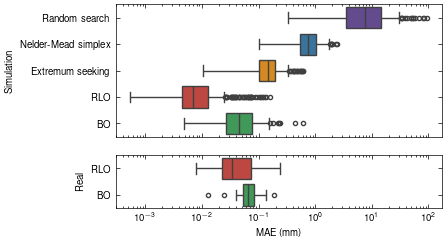

In [7]:
fig, (ax0, ax1) = plt.subplots(
    2,
    1,
    figsize=(
        510 / 72.72 * 0.6,
        510 / 72.72 * 0.49 * 0.11 * len(simulation_studies + real_world_studies),
    ),
    sharex="col",
    height_ratios=[5, 2],
)
plot_final_mae_box(simulation_studies, title=None, palette=palette_colors, ax=ax0)
plot_final_mae_box(real_world_studies, title=None, palette=palette_colors[-2:], ax=ax1)
ax0.set_ylabel("Simulation")
ax1.set_ylabel("Real")

plt.savefig(f"{FIG_DIR}/final_mae_new.pdf")

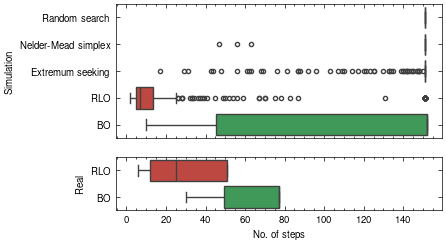

In [8]:
fig, (ax0, ax1) = plt.subplots(
    2,
    1,
    figsize=(510 / 72.72 * 0.6, 510 / 72.72 * 0.49 * 0.13 * len(paper_studies)),
    sharex="col",
    height_ratios=[5, 2],
)
plot_steps_to_threshold_box(
    simulation_studies, threshold=4e-5, title=None, palette=palette_colors, ax=ax0
)
plot_steps_to_threshold_box(
    real_world_studies, threshold=4e-5, title=None, palette=palette_colors[-2:], ax=ax1
)
ax0.set_ylabel("Simulation")
ax1.set_ylabel("Real")

plt.savefig(f"{FIG_DIR}/steps_to_target_new.pdf")

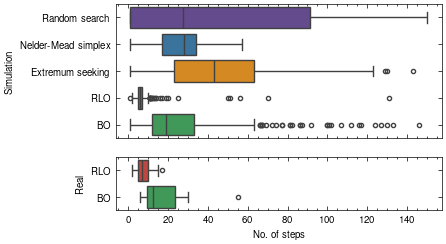

In [9]:
fig, (ax0, ax1) = plt.subplots(
    2,
    1,
    figsize=(510 / 72.72 * 0.6, 510 / 72.72 * 0.49 * 0.13 * len(paper_studies)),
    sharex="col",
    height_ratios=[5, 2],
)
plot_steps_to_convergence_box(
    simulation_studies, threshold=4e-5, title=None, palette=palette_colors, ax=ax0
)
plot_steps_to_convergence_box(
    real_world_studies, threshold=4e-5, title=None, palette=palette_colors[-2:], ax=ax1
)
ax0.set_ylabel("Simulation")
ax1.set_ylabel("Real")

plt.savefig(f"{FIG_DIR}/steps_to_convergence_new.pdf")

In [10]:
# def get_custom_violin(data):
#     quartile1 = []
#     medians = []
#     means = []
#     quartile3 = []
#     whiskers = []
#     whiskers_min = []
#     whiskers_max = []
#     inds = []

#     for d in data:
#         q1, m, q3 = np.percentile(d, [25, 50, 75])
#         w = np.array([adjacent_values(d, q1, q3)])
#         wmin = w[:, 0]
#         wmax = w[:, 1]

#         quartile1.append(q1)
#         medians.append(m)
#         quartile3.append(q3)
#         whiskers.append(w)
#         whiskers_min.append(wmin)
#         whiskers_max.append(wmax)
#         means.append(np.mean(d))

#     return quartile1, medians, quartile3, whiskers, whiskers_min, whiskers_max, means

In [11]:
# violin_none = ax[1].violinplot(
#     fft_finger_norm[0:1], [0], showmeans=False, showextrema=False, showmedians=False
# )
# violin_bbb = ax[1].violinplot(
#     fft_finger_norm[1:4],
#     [1, 2, 3],
#     showmeans=False,
#     showextrema=False,
#     showmedians=False,
# )
# violin_llrf = ax[1].violinplot(
#     fft_finger_norm[4:10],
#     [4, 5, 6, 7, 8, 9],
#     showmeans=False,
#     showextrema=False,
#     showmedians=False,
# )

# # # ax[0].set_yscale('log')
# for pc in violin_llrf["bodies"]:
#     pc.set_facecolor("limegreen")
#     pc.set_edgecolor("black")
#     pc.set_alpha(1)

# for pc in violin_bbb["bodies"]:
#     pc.set_facecolor("wheat")
#     pc.set_edgecolor("black")
#     pc.set_alpha(1)

# for pc in violin_none["bodies"]:
#     pc.set_facecolor("orchid")
#     pc.set_edgecolor("black")
#     pc.set_alpha(1)

# # quartile1, medians, quartile3, whiskers, whiskers_min, whiskers_max = get_custom_violin(areas_finger_norm)
# quartile1, medians, quartile3, whiskers, whiskers_min, whiskers_max, means = (
#     get_custom_violin(fft_finger_norm)
# )

# ax[1].scatter(
#     np.arange(10),
#     means,
#     marker="h",
#     color="orangered",
#     s=70,
#     zorder=3,
#     edgecolors="black",
# )